# Baseball Case Study


Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 



#  Ridge Regression Model

# Step 1: importing necessary libraries and load the data 

In [1]:

#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge

from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset 
ball=pd.read_csv(r'C:\Users\HP\Downloads\baseball.csv')
ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# These are columns in the given dataset:


1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.



# Step 2: Exploratory Data Analysis (EDA)

In [3]:
# finding shape of the dataset
ball.shape

(30, 17)

There are 30 rows and 17 columns present in the given dataset and 'w' is the target. w is a continuous data so our model is a regression model.

In [4]:
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#display the columns in a list
ball.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [6]:
#finding the null values
ball.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Yes, there is no null values in the given dataset.

In [7]:
#Getting the normal summary and statistical information of the data
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Total features in the given dataset are 17, out of which there is 1  float type and remaining all are integers.No null values are present in the dataset and the Total no of records are 30.

<AxesSubplot:>

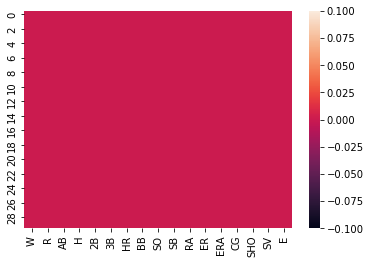

In [8]:
#plot heatmap for null values
sns.heatmap(ball.isna())

In [9]:
#Checking unique values of each columns
ball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [10]:
ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values.

In [11]:
#Checking value counts of target column
ball['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [12]:
# checking the unique values for Target variable is W
ball.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

# Step 3: Visualization

Univariate Analysis: 

<AxesSubplot:xlabel='W', ylabel='count'>

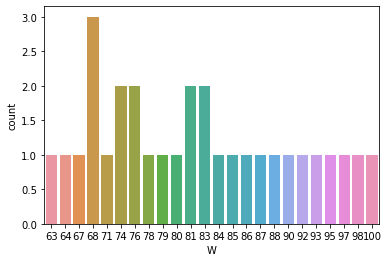

In [13]:
#countplot for target variable
sns.countplot(ball.W)

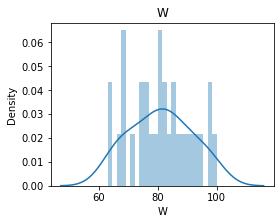

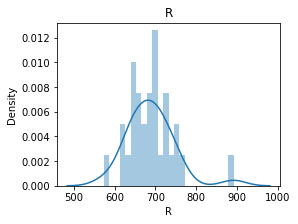

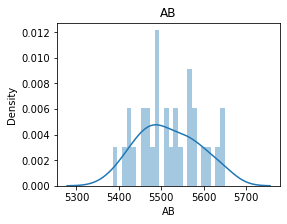

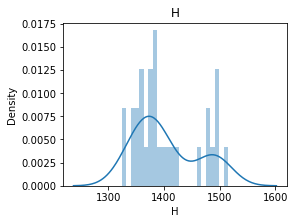

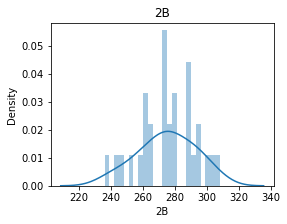

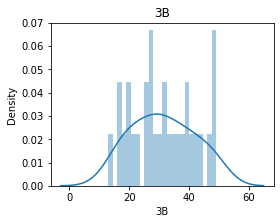

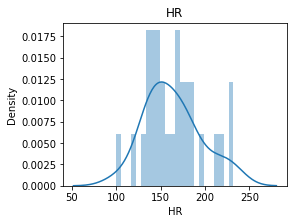

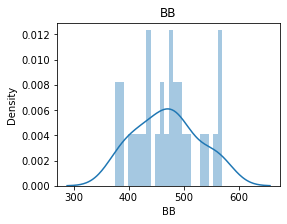

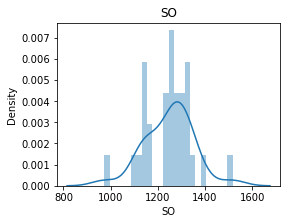

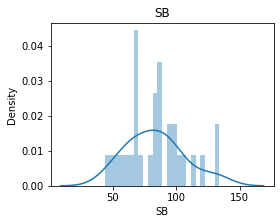

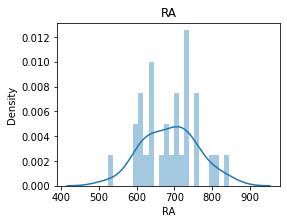

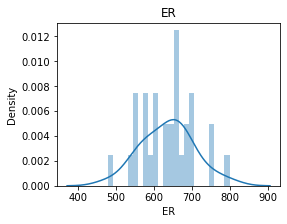

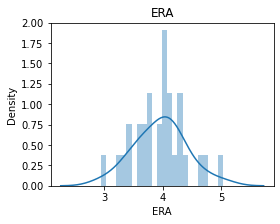

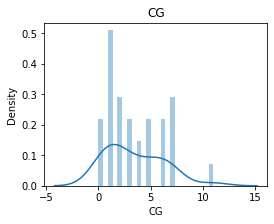

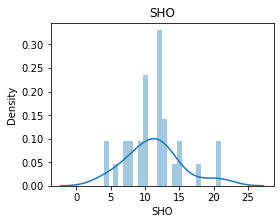

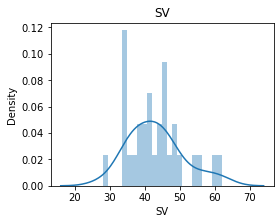

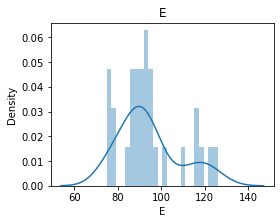

In [16]:
for k in ball:              
    plt.figure(figsize = (4, 3))
    sns.distplot(ball[k], bins = 24)
    plt.title(k)
    plt.show()


<AxesSubplot:xlabel='W', ylabel='Density'>

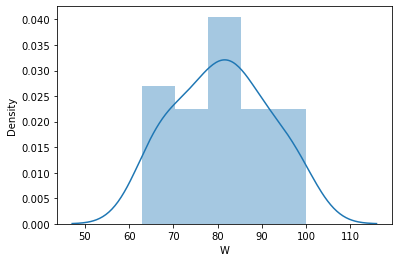

In [95]:
#distribution plot for target variable
sns.distplot(ball.W)

Here the distribution seems to be normal distribution.

# Bivariate analysis:

# Relationship between features and target variable

    


In [96]:
ball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

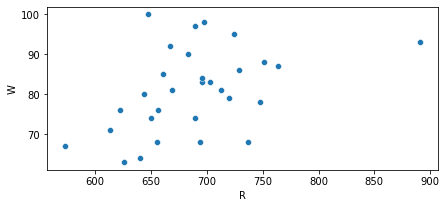

In [17]:
#finding relationship between r and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='R', y='W',data=ball, palette='Set2')


R has positive graph with W,  more the run, more chances to WIN. here it highly correlated.

<AxesSubplot:xlabel='R', ylabel='W'>

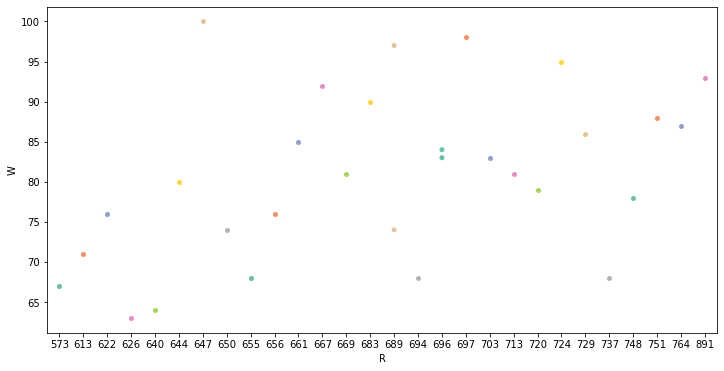

In [18]:
#finding relationship between r and w
plt.figure(figsize=(12,6))
sns.swarmplot(x='R', y='W',data=ball, palette='Set2')


<AxesSubplot:xlabel='AB', ylabel='W'>

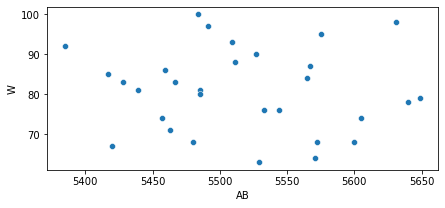

In [19]:
#finding relationship between ab and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='AB', y='W',data=ball, palette='Set2')


There is no particular relation is seen between AB and W.

<AxesSubplot:xlabel='H', ylabel='W'>

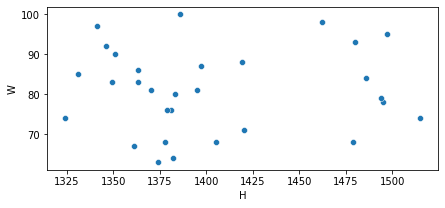

In [20]:
#finding relationship between h and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='H', y='W',data=ball, palette='Set2')


There is very low relation  between H and W.

<AxesSubplot:xlabel='2B', ylabel='W'>

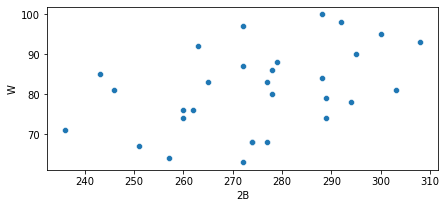

In [21]:
#finding relationship between 2b and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='2B', y='W',data=ball, palette='Set2')


if 2B increases the W also increases which means it is high correlated.

<AxesSubplot:xlabel='3B', ylabel='W'>

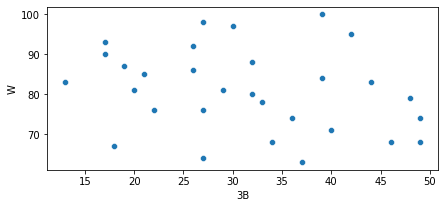

In [22]:
#finding relationship between 3b and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='3B', y='W',data=ball, palette='Set2')


here they are not much related. (low correlation)

<AxesSubplot:xlabel='HR', ylabel='W'>

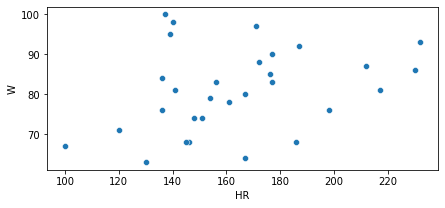

In [23]:
#finding relationship between hr and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='HR', y='W',data=ball, palette='Set2')


here strongly correlated to each other.

<AxesSubplot:xlabel='BB', ylabel='W'>

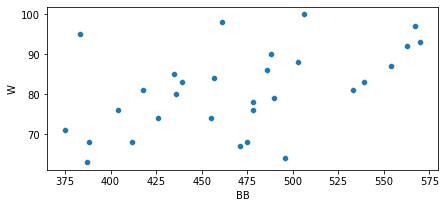

In [24]:
#finding relationship between bb and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='BB', y='W',data=ball, palette='Set2')


strongly correlated.

<AxesSubplot:xlabel='SO', ylabel='W'>

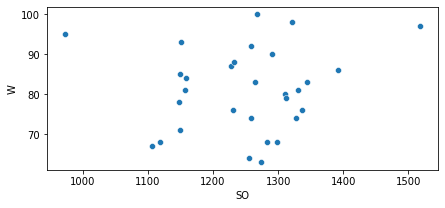

In [25]:
#finding relationship between so and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='SO', y='W',data=ball, palette='Set2')


positively correlated to each other

<AxesSubplot:xlabel='SB', ylabel='W'>

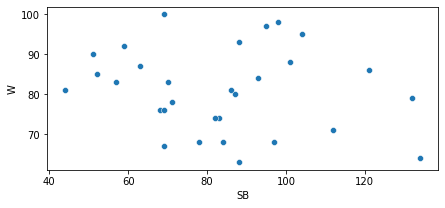

In [26]:
#finding relationship between sb and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='SB', y='W',data=ball, palette='Set2')


if SB increases W decreaesed which means there is negative correlation.


<AxesSubplot:xlabel='RA', ylabel='W'>

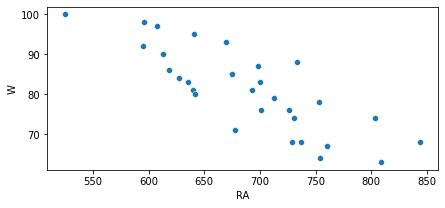

In [27]:
#finding relationship between ra and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='RA', y='W',data=ball, palette='Set2')


for higher RA the W is low and for lower RA the W is high that means they are inversely propotional. negatively correlated.

<AxesSubplot:xlabel='ER', ylabel='W'>

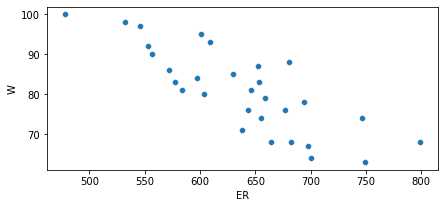

In [28]:
#finding relationship between er and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='ER', y='W',data=ball, palette='Set2')


Negatively correlated.

<AxesSubplot:xlabel='ERA', ylabel='W'>

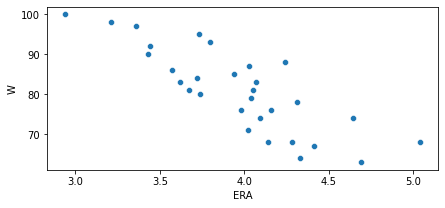

In [29]:
#finding relationship between era and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='ERA', y='W',data=ball, palette='Set2')


Negatively correlated.

<AxesSubplot:xlabel='CG', ylabel='W'>

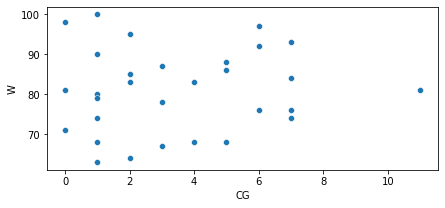

In [30]:
#finding relationship between cg and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='CG', y='W',data=ball, palette='Set2')


<AxesSubplot:xlabel='SHO', ylabel='W'>

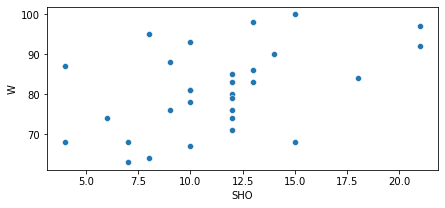

In [31]:
#finding relationship between sho and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='SHO', y='W',data=ball, palette='Set2')


<AxesSubplot:xlabel='SV', ylabel='W'>

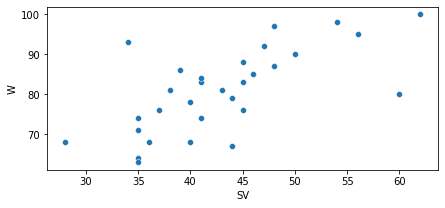

In [32]:
#finding relationship between sv and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='SV', y='W',data=ball, palette='Set2')


SV increases W increases which mean a strong relationship between them.

<AxesSubplot:xlabel='E', ylabel='W'>

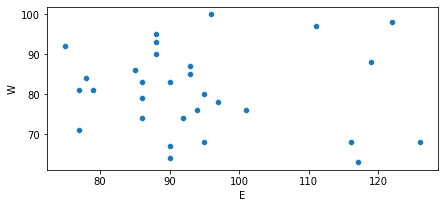

In [33]:
#finding relationship between e and w
plt.figure(figsize=(7,3))
sns.scatterplot(x='E', y='W',data=ball, palette='Set2')


# Multivariate analysis

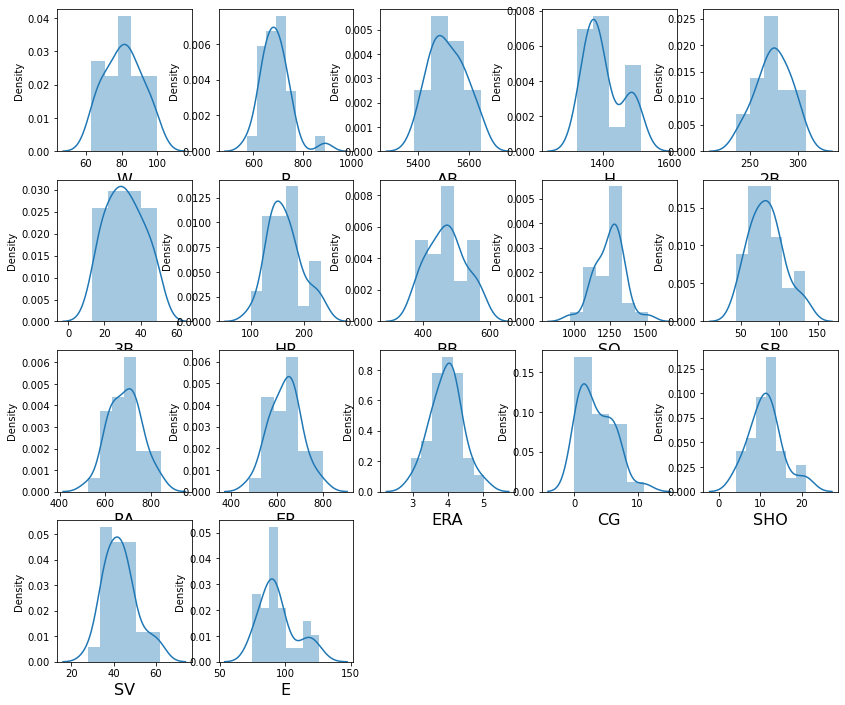

In [114]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in ball:
    if plotnumber<=17:
    
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(ball[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

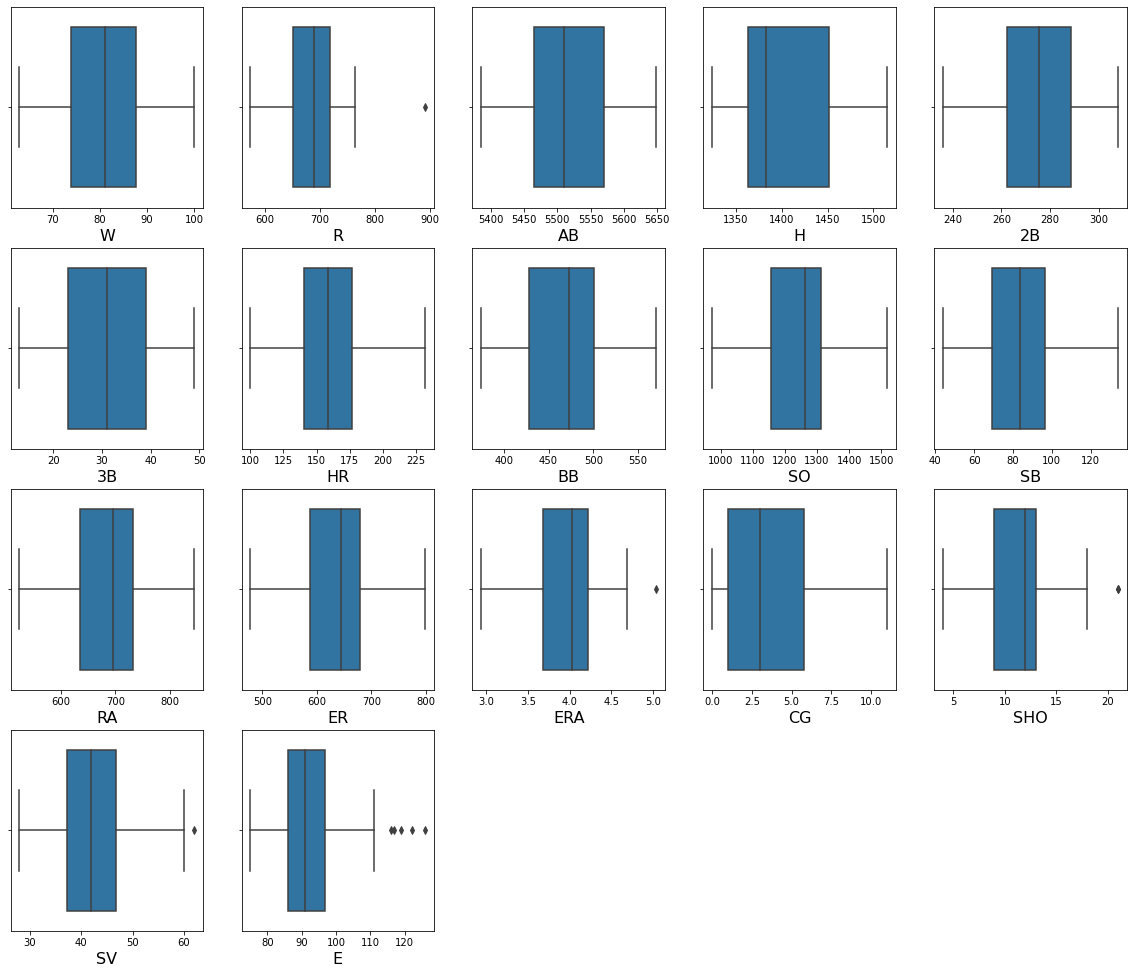

In [115]:
plt.figure(figsize=(20,17),facecolor="white")
plotnumber=1
for columns in ball:
    if plotnumber<=17:
    
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(ball[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

SV,SHO,ERA,E,R has outliers. So,we need remove outliers from that the input variables.

In [34]:
# removing outliers using statsmodel
from scipy import stats
from scipy.stats import zscore
data=ball.drop('W', axis=1)
z=np.abs(zscore(data))

threshold=3
np.where(z>3)
data=ball[(z<3).all(axis=1)]

In [117]:
z

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [118]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [119]:
data.shape

(29, 17)

In [120]:
data_loss=(30-29)/29*100
data_loss

3.4482758620689653

In [121]:
#finding skewness
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [122]:
data['R']=np.log(ball['RA'])

In [123]:
data.skew()

W      0.119013
R     -0.261173
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

The skewness range is -0.5 to 1 which means it is moderately symmetric. 

In [124]:
#corelation b/n features and target variable.
corr=data.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,-0.827511,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,-0.827511,1.000000,0.308230,0.231767,-0.231185,0.290102,-0.084072,-0.424373,-0.150173,0.132756,0.997664,0.989032,0.984441,-0.002129,-0.642630,-0.652784,0.186123
AB,-0.085780,0.308230,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.231767,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,-0.231185,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.290102,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,-0.084072,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,-0.424373,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,-0.150173,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.132756,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


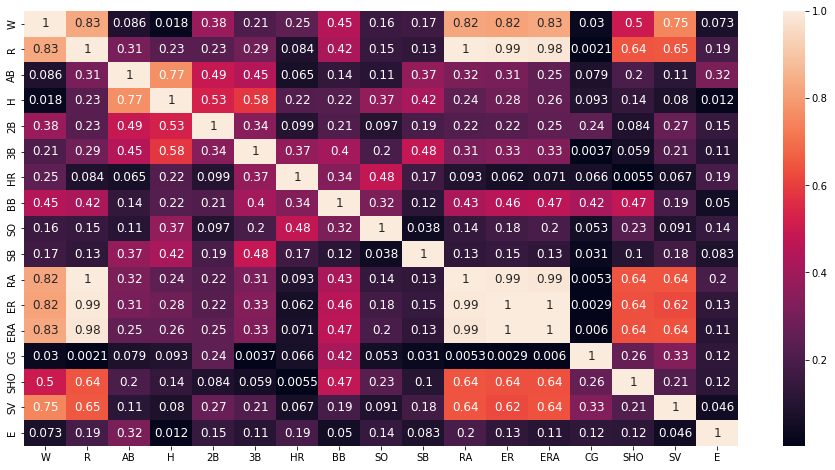

In [125]:
df_corr=data.corr().abs()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

RA, ER, ERA are highly correlated with each other, so i am dropping RA.

In [126]:
corr['W'].sort_values(ascending=False)

W      1.000000
SV     0.749290
SHO    0.497526
BB     0.447513
2B     0.384886
HR     0.245697
SO     0.156469
CG     0.029594
H     -0.018360
E     -0.072858
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
R     -0.827511
Name: W, dtype: float64

In [127]:
ball=ball.drop('RA', axis=1)

In [128]:
#fixing features and label

a=ball.drop('W', axis=1)
b=ball['W']

In [129]:
#normalizing using standard scaler
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [130]:
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.50511008,
        -0.50695519, -0.5398062 , -0.81462859,  1.67160651, -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.24892985,
         0.25459752, -0.5398062 ,  0.1728    ,  0.24987932, -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.75162313,
        -0.64134684,  2.77264091, -0.32091429, -0.65485616, -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.10392217,
         0.05301004,  1.3004422 , -0.56777144, -0.78410408,  0.48575751],
       [ 0.01327008,  1.28073815,  1.98408098,  0.80189192,  1.72234737,
        -0.40377019, -0.25136033,  0.10586628, 

In [131]:
#checking multicollineraity
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,11.041725,R
1,12.849556,AB
2,10.002773,H
3,3.787526,2B
4,3.210034,3B
5,7.906435,HR
6,3.528823,BB
7,2.211159,SO
8,1.908746,SB
9,1069.808286,ER


In [132]:
a=a.drop('ERA', axis=1)

In [133]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,11.014555,R
1,4.365260,AB
2,8.793087,H
3,3.746020,2B
4,3.112275,3B
5,7.895810,HR
6,3.477383,BB
7,2.156598,SO
8,1.800324,SB
9,4.857100,ER


In [134]:
a=a.drop('ER', axis=1)

In [135]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,10.009588,R
1,4.365164,AB
2,7.793753,H
3,3.431311,2B
4,2.505213,3B
5,7.328372,HR
6,3.390692,BB
7,2.154773,SO
8,1.597740,SB
9,2.723353,CG


In [137]:
a=a.drop('HR', axis=1)

In [139]:
a=a.drop('H',axis=1)

In [140]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,2.056467,R
1,1.927472,AB
2,2.784357,2B
3,2.210667,3B
4,2.915740,BB
5,1.280955,SO
6,1.446299,SB
7,2.206197,CG
8,1.652239,SHO
9,1.928778,SV


Yes, there is no multicollinearity.

#  Step4: Modelling

In [141]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,230):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=k)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.9015589361038152 at random state is 159


In [162]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=159)

In [163]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [164]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))


R2_score: 90.15589361038153
R2_score on training data: 83.17084297727423
Mean Absolute Error: 3.058032774196628
Mean Squared Error: 11.331660244049715
Root Mean Squared Error: 3.3662531461626166


In [165]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 48.1210617760618
R2_score on training data: 88.86548119122257
Mean Absolute Error: 6.217777777777775
Mean Squared Error: 59.71842222222219
Root Mean Squared Error: 7.727769550279187


In [166]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 20.849420849420852
R2_score on training data: 100.0
Mean Absolute Error: 7.777777777777778
Mean Squared Error: 91.11111111111111
Root Mean Squared Error: 9.545214042184236


In [167]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 6.9922641582325085
R2_score on training data: 16.28724825999597
Mean Absolute Error: 9.044338695891755
Mean Squared Error: 107.06223814674568
Root Mean Squared Error: 10.347088389819897


In [168]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr))
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 0.4881388030888033
R2_score on training data: 100.0
Mean Absolute Error: 5.839999999999997
Mean Squared Error: 58.92091111111108
Root Mean Squared Error: 7.675995773260371


In [169]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 51.420849420849436
R2_score on training data: 59.448275862068975
Mean Absolute Error: 6.355555555555554
Mean Squared Error: 55.91999999999999
Root Mean Squared Error: 7.477967638335966


In [170]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 62.32568923226432
R2_score on training data: 99.99998719428575
Mean Absolute Error: 4.821014249543803
Mean Squared Error: 43.36731772819353
Root Mean Squared Error: 6.585386680233252


In [171]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 35.98904242011148
R2_score on training data: 99.99999975694561
Mean Absolute Error: 6.16896735297309
Mean Squared Error: 73.68372450307167
Root Mean Squared Error: 8.583922442745605


In [172]:
las=Lasso()
las.fit(x_train,y_train)
pred_las=las.predict(x_test)
pred_train=las.predict(x_train)
print('R2_score:',r2_score(y_test,pred_las)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_las))
print('Mean Squared Error:',mean_squared_error(y_test,pred_las))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_las)))


R2_score: 81.71541469358236
R2_score on training data: 76.26787224646372
Mean Absolute Error: 3.718982005482562
Mean Squared Error: 21.047589308276294
Root Mean Squared Error: 4.587765175799246


In [173]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


R2_score: 89.64084194606642
R2_score on training data: 82.65912730594114
Mean Absolute Error: 2.94332743557284
Mean Squared Error: 11.924541937639106
Root Mean Squared Error: 3.453193006137813


#  Crossvalidation

In [154]:
from sklearn.model_selection import cross_val_score

In [174]:
score=cross_val_score(lr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.52153128 -2.80548608  0.51964474  0.72292713  0.81982276]
-0.2529245495245957
Difference between R2 score and cross validation score is-  1.154483485628411


In [175]:
score=cross_val_score(rfr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.19901847 -1.94868511 -0.04824832  0.23533984  0.60142107]
-0.27183820066353487
Difference between R2 score and cross validation score is-  1.1733971367673501


In [176]:
score=cross_val_score(Dr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-2.38898757 -4.07251908 -0.84044174 -0.0700157  -0.01183432]
-1.4767596810344037
Difference between R2 score and cross validation score is-  2.378318617138219


In [177]:
score=cross_val_score(tr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.40857034 -2.99874695  0.18575225  0.24846317  0.76381621]
-0.44185713062943843
Difference between R2 score and cross validation score is-  1.3434160667332535


In [178]:
score=cross_val_score(gb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.47215755 -4.53807327 -0.09168503  0.56286207  0.64233964]
-0.7793428294041483
Difference between R2 score and cross validation score is-  1.6809017655079637


In [179]:
score=cross_val_score(las, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[ 0.51117563 -1.45286926  0.51581186  0.50582895  0.73817427]
0.16362428915107124
Difference between R2 score and cross validation score is-  0.7379346469527439


In [180]:
score=cross_val_score(xgb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.7141863  -2.7690856   0.18216624  0.11710296  0.77329147]
-0.48214224712537146
Difference between R2 score and cross validation score is-  1.3837011832291868


In [181]:
score=cross_val_score(rd, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.13041777 -1.99438488  0.47410459  0.63800496  0.87417785]
-0.027703048612576487
Difference between R2 score and cross validation score is-  0.9292619847163917


Lasso Regression model has low cv than others so i am considering that method and doing hyperparameter tuning to increase my model score.

#  Step5: Hyperparmeter tuning

In [666]:
#giving parameters for the decision tree classifier:
grid_param={
    'alpha': range(10,20),'copy_X': [True],
 'fit_intercept': [True],
 'max_iter': [None],
 'normalize': ['deprecated'],
 'positive': [False],
 'random_state': ['None'],
 ,}

    

In [674]:
las.get_params()



{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [675]:
grid_search=GridSearchCV(estimator=las,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [676]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': range(10, 20)})

In [677]:
grid_search.best_params_

{'alpha': 10}

In [740]:
final_model=Lasso(alpha=0.47)

In [741]:
final_model.fit(x_train,y_train)

Lasso(alpha=0.47)

In [742]:
final_model.score(x_test,y_test)

0.915672843697778

In [744]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 91.5672843697778
Mean Absolute Error: 2.752947707672888
Mean Squared Error: 8.52849462256546
Root Mean Squared Error: 2.92035864622232


By tuning the model now the r2 score is increased to 91.5% which is good.

# Final step: Saving the model

In [747]:
#saving my model
import pickle

filename='Baseball prediction'
pickle.dump(las, open(filename,'wb'))


In [748]:
import pickle
loaded_model=pickle.load(open('Baseball prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.16459327491482


In [749]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8
original,77.002492,79.234712,87.678873,71.132494,66.770724,83.157963,72.322738,103.341896,73.605414
predicted,71.000000,81.000000,84.000000,74.000000,68.000000,87.000000,67.000000,100.000000,74.000000


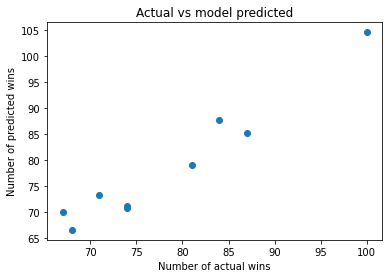

In [750]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Number of actual wins')
plt.ylabel('Number of predicted wins')
plt.title('Actual vs model predicted')
plt.show()

Done